In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings 

In [10]:
#Plan1 = base de dados
#Plan2 = Novas entradas
base_seguro = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

# Classificacao dos clientes
 ## 1 = Nao usou
 ## 2 = Servico
 ## 3 = Furto

In [11]:
base_seguro.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [12]:
base_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [13]:
base_seguro.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


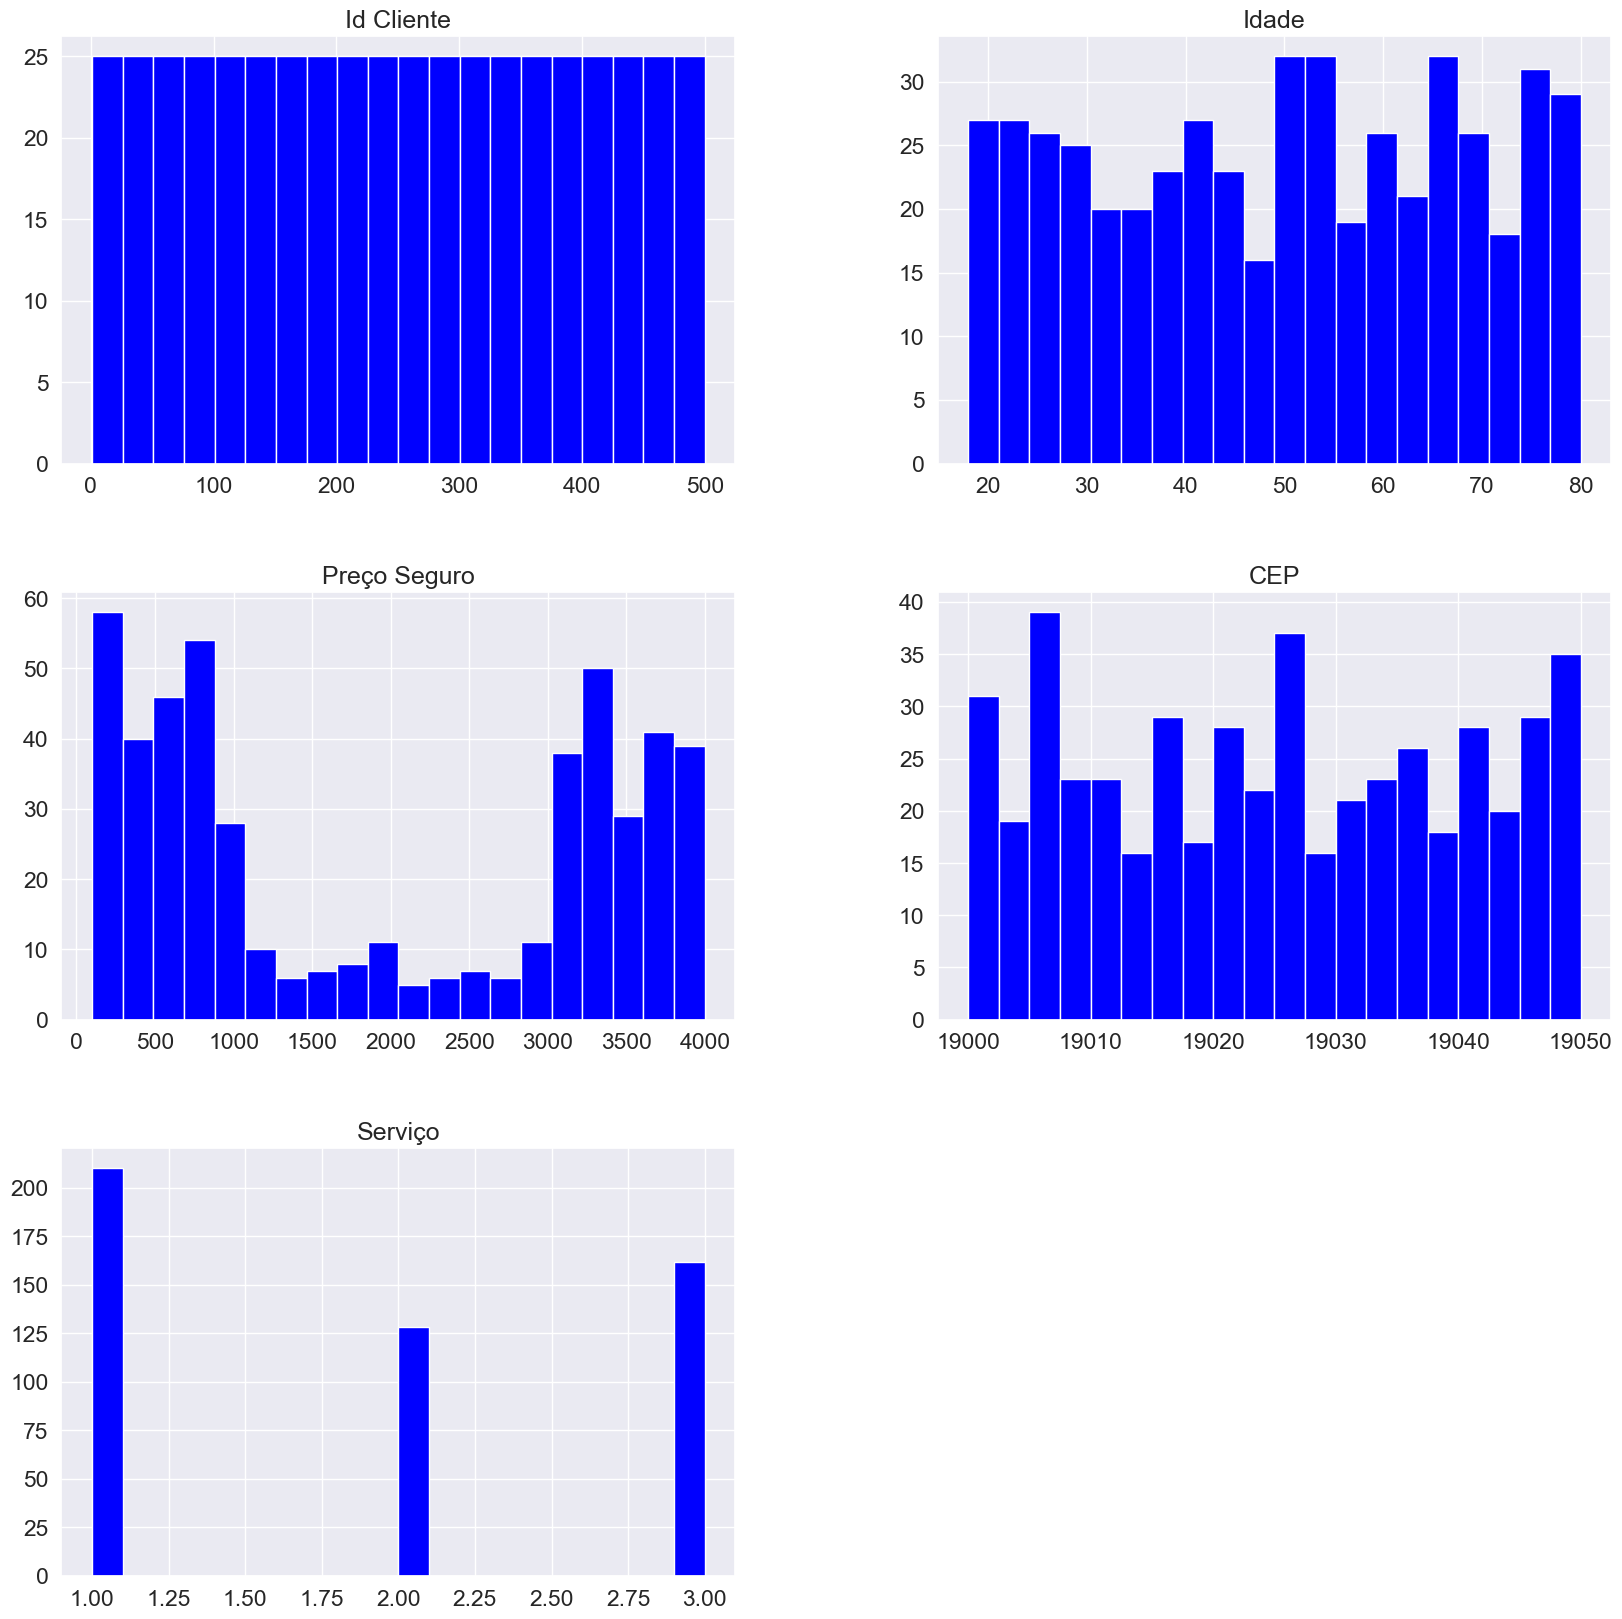

In [16]:
#Histograma para analisar os dados
sns.set_theme( font_scale=1.5, rc={ 'figure.figsize': (20,20) } )
eixo = base_seguro.hist( bins=20, color='blue')

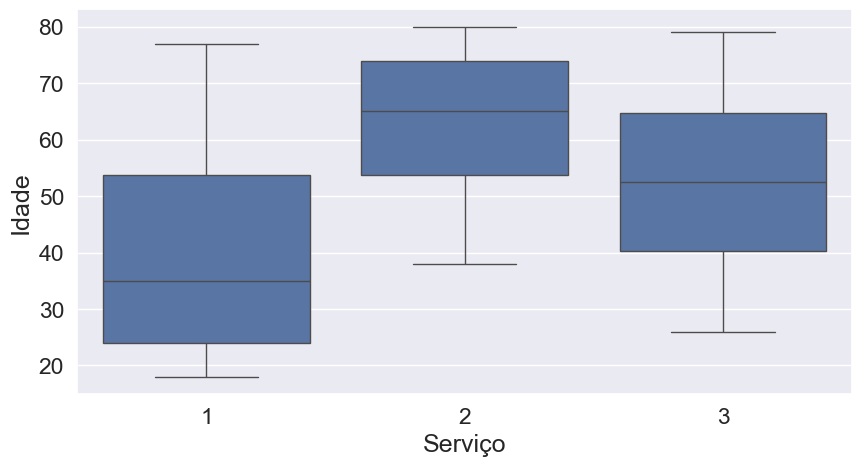

In [18]:
plt.figure( figsize=(10,5) )
sns.boxplot(data=base_seguro, x='Serviço' , y='Idade' );

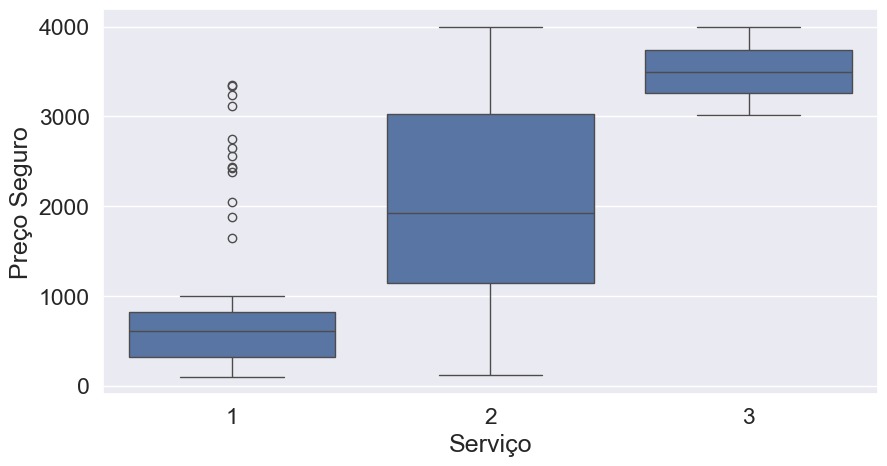

In [19]:
plt.figure( figsize=(10,5) )
sns.boxplot(data=base_seguro, x='Serviço' , y='Preço Seguro' );

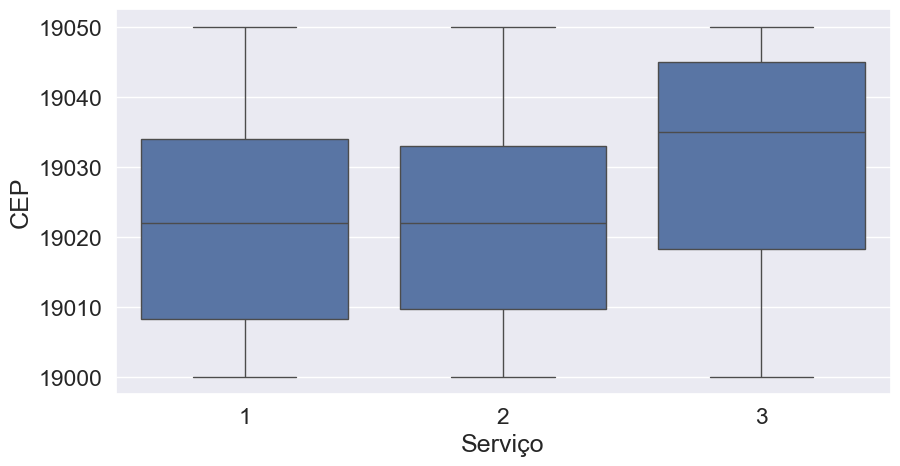

In [20]:
plt.figure( figsize=(10,5) )
sns.boxplot(data=base_seguro, x='Serviço' , y='CEP' );

In [21]:
#Separando os dados para serem utilizados no modelo
caracteristicas = base_seguro.iloc[:, 1:4].values
previsor = base_seguro.iloc[:, 4:5].values

In [25]:
from sklearn.model_selection import train_test_split

#Definindo a porcentagem  de dados para treinamento e testes
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    caracteristicas,
    previsor,
    test_size=0.30,
    random_state=10
)




In [26]:
from sklearn.ensemble import RandomForestClassifier

alg_floresta_aleatoria = RandomForestClassifier( n_estimators=500)

alg_floresta_aleatoria.fit(x_treinamento, y_treinamento)


c:\Users\Velozo\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=500)